# Model review

Calculate total number of params for different layer sizes.

For the current simple architechture, the approximate formula for the total number of trainable parameters is

    window_len * datapoint_size * hidden_layer1_size
       + hidden_layer1_size * hidden_layer2_size +
       + hidden_layer2_size * target_len * datapoint_size
       
This does not account for the biases, but otherwise precise.

Assuming `hidden_layer1_size = hidden_layer2_size =: size`, it simplifies to:

    ((window_len + target_len) * datapoint_size + size) * size

And I denoted `chunk_len := window_len + target_len` in code.

In [1]:
# Custom code imports
from models import get_number_of_parameters_in_model, ThreeFullyConnectedLayers

In [2]:
# Standard code imports
import matplotlib.pyplot as plt

In [3]:
# ThreeFullyConnectedLayers?
ThreeFullyConnectedLayers(window_len=50, datapoint_size=3, target_len=25,
                          hidden_layer1_size=10, hidden_layer2_size=10)

ThreeFullyConnectedLayers(
  (fc1): Linear(in_features=150, out_features=10, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=10, out_features=75, bias=True)
)

In [4]:
def get_trainable_parameter_count(chunk_len: int, size: int, datapoint_size: int = 3) -> int:
    m = ThreeFullyConnectedLayers(window_len=chunk_len - 1, datapoint_size=datapoint_size,
                                  target_len=1, hidden_layer1_size=size, hidden_layer2_size=size)
    return get_number_of_parameters_in_model(m)

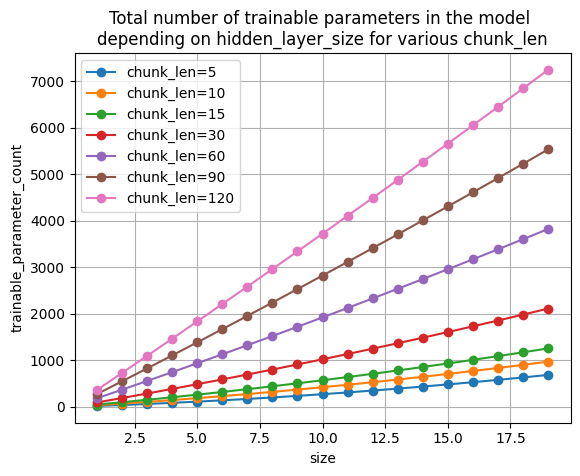

In [5]:
for chunk_len in (5, 10, 15, 30, 60, 90, 120):
    sizes = list(range(1, 20))
    plt.plot(sizes, [get_trainable_parameter_count(chunk_len, s) for s in sizes],
             "o-", label=f"chunk_len={chunk_len}")

plt.xlabel("size")
plt.ylabel("trainable_parameter_count")
plt.grid()
plt.legend()
plt.title("Total number of trainable parameters in the model \n"
          "depending on hidden_layer_size for various chunk_len")
plt.show()

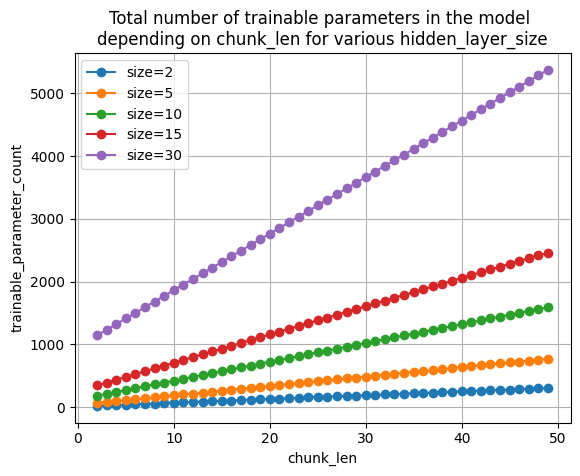

In [6]:
for size in (2, 5, 10, 15, 30):
    chunk_lens = list(range(2, 50))
    plt.plot(chunk_lens, [get_trainable_parameter_count(chunk_len=c, size=size) for c in chunk_lens],
             "o-", label=f"size={size}")

plt.xlabel("chunk_len")
plt.ylabel("trainable_parameter_count")
plt.grid()
plt.legend()
plt.title("Total number of trainable parameters in the model \n"
          "depending on chunk_len for various hidden_layer_size")
plt.show()